In [1]:
import numpy as np
import pandas as pd
import time, warnings
import datetime as dt
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 

In [2]:
df = pd.read_excel("Student_Final_GPA.xlsx")

In [3]:
df.shape

(395, 32)

In [4]:
df.info()
#15 numeric and 17 categorical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   StudentID    395 non-null    int64  
 1   school2      395 non-null    object 
 2   sex          395 non-null    object 
 3   age          395 non-null    int64  
 4   address      395 non-null    object 
 5   famsize      395 non-null    object 
 6   Pstatus      395 non-null    object 
 7   Medu         395 non-null    int64  
 8   Fedu         395 non-null    int64  
 9   Mjob         395 non-null    object 
 10  Fjob         395 non-null    object 
 11  reason       395 non-null    object 
 12  guardian     395 non-null    object 
 13  traveltime   395 non-null    int64  
 14  studytime    395 non-null    int64  
 15  failures     395 non-null    int64  
 16  schoolsup    395 non-null    object 
 17  famsup       395 non-null    object 
 18  paid         395 non-null    object 
 19  activiti

In [5]:
df.describe()

,StudentID,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,Final_Grade
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,3.950000e+02,395.000000
mean,198.000000,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,3.199874e-01,52.075949
std,114.170924,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,4.397442e-01,22.907213
min,1.000000,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.678637e-33,0.000000
25%,99.500000,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,3.354626e-04,40.000000
50%,198.000000,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,1.831564e-02,55.000000
75%,296.500000,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,1.000000e+00,70.000000
max,395.000000,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000e+00,100.000000


In [6]:
df.isna().sum()

StudentID      0
school2        0
sex            0
age            0
address        0
famsize        0
Pstatus        0
Medu           0
Fedu           0
Mjob           0
Fjob           0
reason         0
guardian       0
traveltime     0
studytime      0
failures       0
schoolsup      0
famsup         0
paid           0
activities     0
nursery        0
higher         0
internet       0
romantic       0
famrel         0
freetime       0
goout          0
Dalc           0
Walc           0
health         0
absences       0
Final_Grade    0
dtype: int64

In [7]:
print("Duplicates:", df.duplicated().sum()) 

Duplicates: 0


In [8]:
df = df.drop(["StudentID", "address"], axis=1)

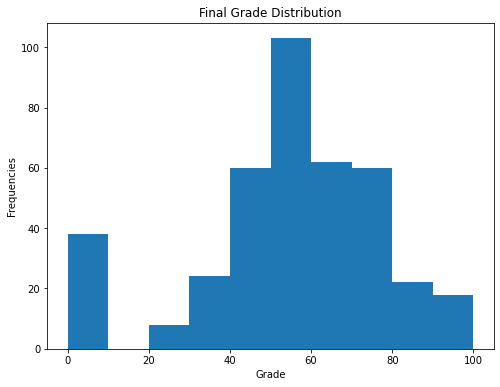

In [9]:
plt.figure(figsize=(8,6)) 
plt.hist(df.Final_Grade)
plt.title("Final Grade Distribution") 
plt.ylabel("Frequencies")
plt.xlabel("Grade")
plt.show()

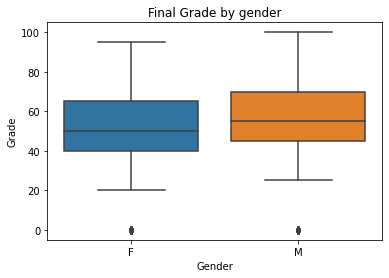

In [10]:
import seaborn as sns
sns.boxplot(x=df.sex,y=df.Final_Grade)
plt.xlabel("Gender")#giving title to y axis
plt.ylabel("Grade")
plt.title("Final Grade by gender")
plt.show()
#males mean grade, min grade and max grades were a little bit higher than that of females, not much difference

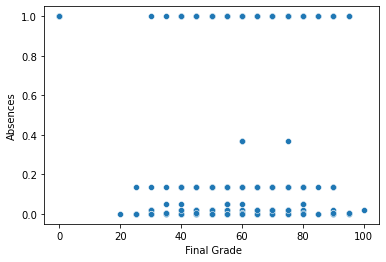

In [11]:
sns.scatterplot(df.Final_Grade,df.absences)
plt.xlabel(" Final Grade")
plt.ylabel("Absences")
plt.show()
#no relationship

In [12]:
data_numeric = df.select_dtypes(exclude=["object"])

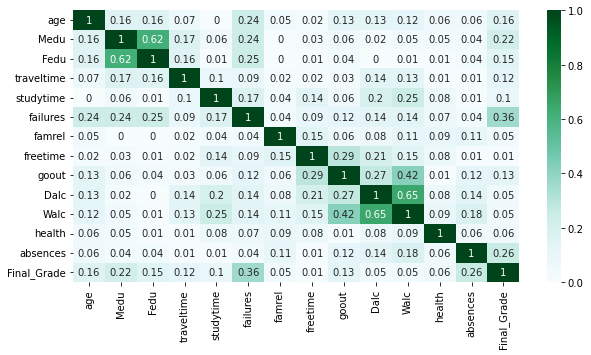

In [13]:
plt.figure(figsize=(10,5))
sns.heatmap(data_numeric.corr().abs().round(2),annot=True, cmap = "BuGn")
plt.show()

In [14]:
#there is high correlation between Walc and Dalc, and between Fedu and Medu, for the rest of the data there is not much correlation.
#so in some cases it would be better to drop one of the categories for high correlation or combine them (for example combine Walc and Dalc)
data_new = df[['Medu','failures','goout', 'absences','romantic','schoolsup','famsup','Final_Grade']]

In [15]:
Y = data_new["Final_Grade"]
data_new_obj = data_new.select_dtypes(include=["object"])
data_dummies= pd.get_dummies(data_new_obj, drop_first=True)

In [16]:
data_numeric = data_new.select_dtypes(exclude=["object"])

In [17]:
data_ols = pd.concat((data_numeric, data_dummies), axis=1)

In [18]:
Y_linear=data_ols["Final_Grade"]
X_linear=data_ols.drop("Final_Grade", axis=1)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_linear, Y_linear, test_size = 0.1,  random_state = 42)

In [20]:
X_train = sm.add_constant(X_train)

In [21]:
model_linear= sm.OLS(y_train,X_train)

In [22]:
results = model_linear.fit()

In [23]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Final_Grade   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     17.87
Date:                Thu, 19 Sep 2024   Prob (F-statistic):           2.95e-20
Time:                        23:20:08   Log-Likelihood:                -1556.7
No. Observations:                 355   AIC:                             3129.
Df Residuals:                     347   BIC:                             3160.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            64.2123      4.310     14.897      0.000      55.734      72.690
Medu              3.6126      1.015      3.560      0.000       1.617       5.608
failures         -8.6233      1.483     -5.815      0.000     -11.540      -5.706
goout            -2.9959      0.951     -3.149      0.002      -4.867      -1.125
absences        -14.5370      2.426     -5.992      0.000     -19.309      -9.765
romantic_yes     -4.8654      2.222     -2.190      0.029      -9.235      -0.496
schoolsup_yes    -5.3467      3.123     -1.712      0.088     -11.489       0.795
famsup_yes       -4.6361      2.206     -2.101      0.036      -8.976      -0.296
==============================================================================
Omnibus:                        4.209   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.122   Jarque-Bera (JB):                4.283
Skew:                          -0.263   Prob(JB):                        0.117
Kurtosis:                       2.884   Cond. No.                         19.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""